# **Big Data Analytics [CN7031] CRWK 2022-23**
# **Group ID: [111]**
# *Group Members* #
1.   Student 1: 
2.   Student 2: 
3.   Student 3: 
4.   Student 4: 

---


If you want to add comments on your group work, please write it here for us:

# Install Pyspark

Reference: https://spark.apache.org/docs/latest/api/python/getting_started/index.html

In [ ]:
pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
# instantiate a live spark session
spark = SparkSession.builder.master("local[*]").appName("111").getOrCreate()

# Loading data

In [ ]:
# Read data from local storage
IDS_df=spark.read.csv("data.csv")

In [ ]:
# read this data using pyspark

IDS_df = spark.read.option("header", "true").csv("/content/archive_IDS2018/*.csv")

In [ ]:
IDS_df.show()

In [ ]:
# The total number of attacks per label
IDS_df.select('Label').groupBy('Label').count().orderBy('count', ascending=False).show()

## Spark SQL Queries. 

In [ ]:
# import librariesSpark SQL Queries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# create a temporary SQL View
IDS_df.createOrReplaceTempView("IDS_sql")

In [ ]:
# Student 1 
# Query 1 [Briefly explain]: Percente rank of each label in the dataset (in descending order)

# write your query here
query1 = spark.sql("SELECT Label, (count(*)*100)/(SELECT count(*) FROM IDS_sql) AS Percentage FROM IDS_sql GROUP BY Label ORDER BY Percentage DESC") 
query1.show()

+--------------------+--------------------+
|               Label|          Percentage|
+--------------------+--------------------+
|              Benign|   72.61437233532669|
|    DDOS attack-HOIC|   9.346189614248903|
|    DoS attacks-Hulk|  6.2930635864925675|
|                 Bot|   3.899050383800149|
|      FTP-BruteForce|  2.6343259648682062|
|      SSH-Bruteforce|   2.555702179476944|
|DoS attacks-SlowH...|  1.9058536368711902|
|DoS attacks-Golde...|  0.5655027004020972|
|DoS attacks-Slowl...|  0.1497271532576623|
|DDOS attack-LOIC-UDP|0.023569424489149754|
|    Brute Force -Web|0.008324230267555202|
|    Brute Force -XSS| 0.00313350730202569|
|       SQL Injection|0.001185283196853...|
+--------------------+--------------------+



In [ ]:
# Student 1 
# Query 2 [Briefly explain]: Find the count of labels with words close to 'B_' and 'U_' in the label column

IDS_sql_2 = spark.sql(""" SELECT Label, count(*) as count FROM IDS_sql WHERE Label LIKE 'B_%' OR Label LIKE 'U_%' GROUP BY Label ORDER BY count DESC """)
IDS_sql_2.show()

+----------------+-------+
|           Label|  count|
+----------------+-------+
|          Benign|5329908|
|             Bot| 286191|
|Brute Force -Web|    611|
|Brute Force -XSS|    230|
+----------------+-------+



In [ ]:
# Student 2 
# Query 1 [Briefly explain]: Getting flow dureation sum and creating the percentage rank

IDS_sql_3 = spark.sql(""" SELECT Label, SUM(`Flow Duration`) as Flow_Duration_sum, PERCENT_RANK() OVER (ORDER BY SUM(`Flow Duration`) DESC) AS percent_rank FROM IDS_sql GROUP BY Label ORDER BY Label DESC """)
IDS_sql_3.show()

+--------------------+------------------+-------------------+
|               Label| Flow_Duration_sum|       percent_rank|
+--------------------+------------------+-------------------+
|      SSH-Bruteforce|   3.4394383592E10| 0.4166666666666667|
|       SQL Injection|      2.88468243E8| 0.8333333333333334|
|      FTP-BruteForce|          735386.0| 0.9166666666666666|
|DoS attacks-Slowl...|  7.91063895605E11|0.08333333333333333|
|DoS attacks-SlowH...|          685445.0|                1.0|
|    DoS attacks-Hulk|  1.39384537921E11| 0.3333333333333333|
|DoS attacks-Golde...|  4.66277648662E11|0.16666666666666666|
|DDOS attack-LOIC-UDP|  2.00711432887E11|               0.25|
|    DDOS attack-HOIC|     6.668259505E9| 0.6666666666666666|
|    Brute Force -XSS|       6.5924205E9|               0.75|
|    Brute Force -Web|    2.165463703E10|                0.5|
|                 Bot|   2.1549869953E10| 0.5833333333333334|
|              Benign|7.0213497175711E13|                0.0|
+-------

In [ ]:
# Student 2  
# Query 2 [Briefly explain]: Explain Query made

IDS_sql_E = spark.sql("""EXPLAIN SELECT Label, avg(`Flow Duration`) as Flow_Duration_mean FROM IDS_sql GROUP BY Label ORDER BY Flow_Duration_mean DESC """)
IDS_sql_E.show()

+--------------------+
|                plan|
+--------------------+
|== Physical Plan ...|
+--------------------+



In [ ]:
# Student 3 
# Query 1 [Briefly explain]: Using ntile and the over function, create a new column called 'Flow Duration Group' that groups the Flow Duration into 5 groups

from pyspark.sql.window import Window
from pyspark.sql.functions import ntile

window = Window.orderBy('Flow Duration')

IDS_sql_4 = IDS_df.withColumn('Flow Duration Group', ntile(5).over(window)) 
IDS_sql_4.show()

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-----------+--------------------+-----------------+----------------+-------------+-------------+-------------+-----------------+----------------+-------------+-------------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+----------+----------+-----------+-----------+-------------+-------------+--------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+---

+------+--------+-------------+-------------+--------------------+
| Label|Dst Port|Fwd_Packets_s|Bwd_Packets_s|  Flow_Duration_mean|
+------+--------+-------------+-------------+--------------------+
|Benign|   43174|        177.0|        124.0|1.2719350542857142E7|
|Benign|   57766|        248.0|        141.0|          6212707.25|
|Benign|   45494|        249.0|        165.0|1.0480359235294119E7|
|Benign|   56532|        312.0|        164.0|   7023923.223880597|
|Benign|   51131|        313.0|        104.0|   2621306.762962963|
|Benign|   63153|        116.0|         40.0|   4695.607142857143|
|Benign|   50421|        382.0|        129.0|  1154538.4597701149|
|Benign|    4157|         12.0|          0.0|5.7655278333333336E7|
|Benign|   49700|        441.0|        195.0|  2426456.5393258426|
|Benign|   51569|        324.0|        118.0|  2545884.3576642335|
|Benign|   49674|        498.0|        230.0|   4297638.705555555|
|Benign|   50136|        497.0|        221.0|  3027481.8802083

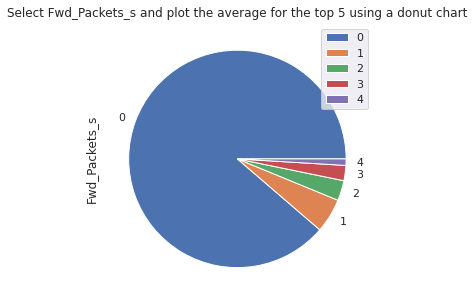

In [ ]:
# Student 3 
# Query 2 [Briefly explain]: Create sets of features for each label and destination port 

IDS_sql_6 = spark.sql(""" SELECT Label, `Dst Port`, sum(`Tot Fwd Pkts`) as Fwd_Packets_s, sum(`Tot Bwd Pkts`) as Bwd_Packets_s, avg(`Flow Duration`) as Flow_Duration_mean FROM IDS_sql GROUP BY Label, `Dst Port`""")
IDS_sql_6.show()

# Select Fwd_Packets_s and plot the average for the top 5 using a donut chart

IDS_sql_7 = spark.sql(""" SELECT Label, `Dst Port`, sum(`Tot Fwd Pkts`) as Fwd_Packets_s FROM IDS_sql GROUP BY Label, `Dst Port` ORDER BY Fwd_Packets_s DESC LIMIT 5 """)
IDS_sql_7.show()

# plot the result
IDS_sql_7.toPandas().plot(kind='pie', y='Fwd_Packets_s', figsize=(10, 5), title='Select Fwd_Packets_s and plot the average for the top 5 using a donut chart')

In [ ]:
# Student 4 
# Query 1 [Briefly explain]: using distribute to repartition the data based on destination port 

spark.sql("SELECT `Dst Port`,Label FROM IDS_sql DISTRIBUTE BY `Dst Port`").show()

+--------+------+
|Dst Port| Label|
+--------+------+
|   57868|Benign|
|   35640|Benign|
|   57868|Benign|
|   35640|Benign|
|   33174|Benign|
|    9993|Benign|
|    9009|Benign|
|   33665|Benign|
|   50802|Benign|
|   51244|Benign|
|   49630|Benign|
|   64595|Benign|
|   50254|Benign|
|   64612|Benign|
|   50802|Benign|
|   51244|Benign|
|   51063|Benign|
|   51244|Benign|
|   59169|Benign|
|   50254|Benign|
+--------+------+
only showing top 20 rows



+--------------------+--------+-------+
|               Label|Protocol|  count|
+--------------------+--------+-------+
|              Benign|       6|3898104|
|              Benign|      17|1355793|
|    DDOS attack-HOIC|       6| 686012|
|    DoS attacks-Hulk|       6| 461912|
|                 Bot|       6| 285933|
|      FTP-BruteForce|       6| 193360|
|      SSH-Bruteforce|       6| 187589|
|DoS attacks-SlowH...|       6| 139890|
|              Benign|       0|  76011|
|DoS attacks-Golde...|       6|  41508|
|DoS attacks-Slowl...|       6|  10990|
|DDOS attack-LOIC-UDP|      17|   1730|
|    Brute Force -Web|       6|    462|
|                 Bot|       0|    258|
|    Brute Force -XSS|       6|    225|
|    Brute Force -Web|      17|    128|
|       SQL Injection|       6|     87|
|    Brute Force -Web|       0|     21|
|    Brute Force -XSS|      17|      5|
+--------------------+--------+-------+



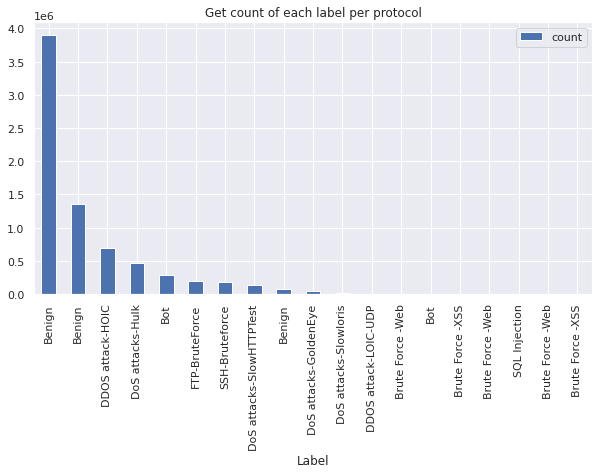

In [ ]:
# Student 4 
# Query 2 [Briefly explain]: Get count of each label per protocol 

IDS_sql_8 = spark.sql(""" SELECT Label, Protocol, count(*) as count FROM IDS_sql GROUP BY Label, Protocol ORDER BY count DESC """)
IDS_sql_8.show()

# plot the result
IDS_sql_8.toPandas().plot(kind='bar', x='Label', y='count', figsize=(10, 5), title='Get count of each label per protocol')


# **Task 2 - Part1: PySpark [45 marks]**

---


In [ ]:
import pyspark.sql.functions as f 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Student 1 
# Analytical method 1: calculation of the mean, getting the max and minimum values
IDS_df.select(f.mean("Flow Duration")).show()
IDS_df.select(f.max("Flow Duration")).show()
IDS_df.select(f.min("Flow Duration")).show()

+------------------+
|avg(Flow Duration)|
+------------------+
|  9795900.24853345|
+------------------+

+------------------+
|max(Flow Duration)|
+------------------+
|          99999994|
+------------------+

+------------------+
|min(Flow Duration)|
+------------------+
|     -110116000000|
+------------------+



In [ ]:
# Student 1 
# Analytical method 2: Get the variance of each feature

# variance in table form
IDS_df.select(f.var_pop("Flow Duration")).show()
IDS_df.select(f.var_pop("Tot Fwd Pkts")).show()
IDS_df.select(f.var_pop("Tot Bwd Pkts")).show()

+----------------------+
|var_pop(Flow Duration)|
+----------------------+
|  5.384380071967787...|
+----------------------+

+---------------------+
|var_pop(Tot Fwd Pkts)|
+---------------------+
|    3437535.336913823|
+---------------------+

+---------------------+
|var_pop(Tot Bwd Pkts)|
+---------------------+
|   29352.337083560506|
+---------------------+



In [ ]:
# Student 1 
# Analytical method 3: Get the standard deviation of each feature 

# skewness in table form
IDS_df.select(f.stddev("Flow Duration")).show()
IDS_df.select(f.stddev("Tot Fwd Pkts")).show()
IDS_df.select(f.stddev("Tot Bwd Pkts")).show()

+--------------------------+
|stddev_samp(Flow Duration)|
+--------------------------+
|       7.337834016610662E8|
+--------------------------+

+-------------------------+
|stddev_samp(Tot Fwd Pkts)|
+-------------------------+
|       1854.0592777044114|
+-------------------------+

+-------------------------+
|stddev_samp(Tot Bwd Pkts)|
+-------------------------+
|        171.3252494015615|
+-------------------------+



+--------------------+--------------------+------------------+------------------+
|               Label|  Flow_Duration_mean| Tot_Fwd_Pkts_mean| Tot_Bwd_Pkts_mean|
+--------------------+--------------------+------------------+------------------+
|DDOS attack-LOIC-UDP|1.1601816929884394E8| 117351.4289017341|               0.0|
|DoS attacks-Slowl...| 7.198033626979072E7|  7.66533212010919|1.9177434030937215|
|    Brute Force -Web|  3.54413044680851E7| 35.27986906710311| 22.76268412438625|
|    Brute Force -XSS|2.8662697826086957E7| 97.01739130434783| 49.16086956521739|
|              Benign| 1.317349139529444E7| 6.130373544909218| 7.475256983797844|
|DoS attacks-Golde...|1.1233440509347595E7| 3.728775175869712| 2.384504191962995|
|       SQL Injection|  3315726.9310344825| 4.149425287356322| 2.528735632183908|
|    DoS attacks-Hulk|   301755.6112874314|  2.22687221808483|0.2415481736781032|
|      SSH-Bruteforce|  183349.68250803617|11.723651173576275|11.153292570459888|
|               

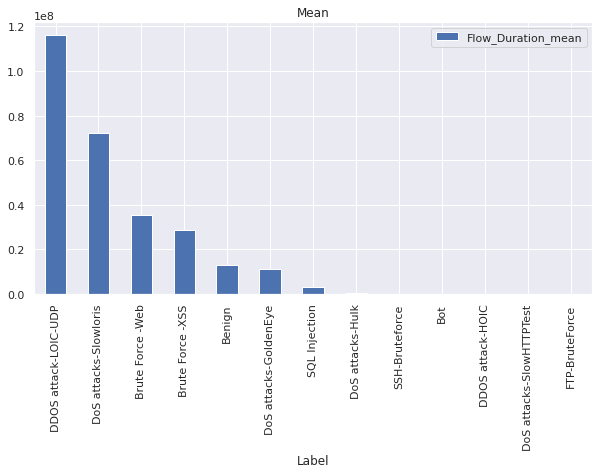

In [ ]:
# Student 2 
# Analytical method 1: Use the pivot table to show the mean of each feature for each label

IDS_sql_9 = spark.sql(""" SELECT Label, avg(`Flow Duration`) as Flow_Duration_mean, avg(`Tot Fwd Pkts`) as Tot_Fwd_Pkts_mean, avg(`Tot Bwd Pkts`) as Tot_Bwd_Pkts_mean FROM IDS_sql GROUP BY Label ORDER BY Flow_Duration_mean DESC """)
IDS_sql_9.show()
# plot the result
IDS_sql_9.toPandas().plot(kind='bar', x='Label', y='Flow_Duration_mean', figsize=(10, 5), title='Mean')

In [ ]:
# Student 2 
# Analytical method 2: Get the correlation of each feature

IDS_df.select(f.corr("Flow Duration", "Tot Fwd Pkts")).show()
IDS_df.select(f.corr("Flow Duration", "Tot Bwd Pkts")).show()
IDS_df.select(f.corr("Tot Fwd Pkts", "Tot Bwd Pkts")).show()

+---------------------------------+
|corr(Flow Duration, Tot Fwd Pkts)|
+---------------------------------+
|             0.002243821666572854|
+---------------------------------+

+---------------------------------+
|corr(Flow Duration, Tot Bwd Pkts)|
+---------------------------------+
|             0.002269772361722...|
+---------------------------------+

+--------------------------------+
|corr(Tot Fwd Pkts, Tot Bwd Pkts)|
+--------------------------------+
|             0.02771364973463959|
+--------------------------------+



In [ ]:
# Student 2 
# Analytical method 3: Use the pivot table to show the skewness of each feature for each label

IDS_sql_11 = spark.sql(""" SELECT Label, skewness(`Flow Duration`) as Flow_Duration_skewness, skewness(`Tot Fwd Pkts`) as Tot_Fwd_Pkts_skewness, skewness(`Tot Bwd Pkts`) as Tot_Bwd_Pkts_skewness FROM IDS_sql GROUP BY Label ORDER BY Flow_Duration_skewness DESC """)
IDS_sql_11.show()

+--------------------+----------------------+---------------------+---------------------+
|               Label|Flow_Duration_skewness|Tot_Fwd_Pkts_skewness|Tot_Bwd_Pkts_skewness|
+--------------------+----------------------+---------------------+---------------------+
|                 Bot|     36.89369275313469|    35.97250723168179|   10.753889866784547|
|    DoS attacks-Hulk|    17.675265852080678|   3.1029520391720067|   3.9807132976764312|
|DoS attacks-Golde...|      3.70723811932296|   2.4399108240483476|  -0.4919920317188058|
|DoS attacks-SlowH...|    2.7329343744691488|    0.645681824512936|    0.645681824512936|
|      FTP-BruteForce|      2.72892825039748|                 null|                 null|
|    DDOS attack-HOIC|    1.2857426016415097|   1.2259389083166958|   1.2259389083166956|
|    Brute Force -Web|    0.5060393954803114|     1.41840322827622|   1.4153947168072873|
|       SQL Injection|   0.24774727087753362|    4.326416913096939|    1.784186709819514|
|    Brute

In [ ]:
# Student 3 
# Analytical method 1: hypothesis testing: Is there a significant difference in the mean of the flow duration between the benign and DoS attacks?

# import libraries
from pyspark.sql.functions import col, avg, stddev, count, when, lit
from pyspark.sql import Window

# calculate the mean and standard deviation of the flow duration for each label
IDS_sql_12 = spark.sql(""" SELECT Label, avg(`Flow Duration`) as Flow_Duration_mean, stddev(`Flow Duration`) as Flow_Duration_std FROM IDS_sql GROUP BY Label ORDER BY Flow_Duration_mean DESC """)
IDS_sql_12.show()

+--------------------+--------------------+--------------------+
|               Label|  Flow_Duration_mean|   Flow_Duration_std|
+--------------------+--------------------+--------------------+
|DDOS attack-LOIC-UDP|1.1601816929884394E8|1.6794194753598668E7|
|DoS attacks-Slowl...| 7.198033626979072E7| 4.824123361388482E7|
|    Brute Force -Web|  3.54413044680851E7| 3.893839524384816E7|
|    Brute Force -XSS|2.8662697826086957E7|2.9463155858369075E7|
|              Benign| 1.317349139529444E7| 8.610674223238168E8|
|DoS attacks-Golde...|1.1233440509347595E7| 1.713644153030773E7|
|       SQL Injection|  3315726.9310344825|    2892603.93479093|
|    DoS attacks-Hulk|   301755.6112874314|   3485600.966175501|
|      SSH-Bruteforce|  183349.68250803617|  184682.80800469534|
|                 Bot|   75298.90860649008|    2485232.90022666|
|    DDOS attack-HOIC|    9720.32487041043|   9185.647482588738|
|DoS attacks-SlowH...|   4.899885624419187|   6.437453371607073|
|      FTP-BruteForce|  3

In [ ]:
# Student 3 
# Analytical method 2: Get the covariance of each feature

# covariance in table form
IDS_df.select(f.covar_pop("Flow Duration", "Tot Fwd Pkts")).show()
IDS_df.select(f.covar_pop("Flow Duration", "Tot Bwd Pkts")).show()
IDS_df.select(f.covar_pop("Tot Fwd Pkts", "Tot Bwd Pkts")).show()

+--------------------------------------+
|covar_pop(Flow Duration, Tot Fwd Pkts)|
+--------------------------------------+
|                   3.052669426142415E9|
+--------------------------------------+

+--------------------------------------+
|covar_pop(Flow Duration, Tot Bwd Pkts)|
+--------------------------------------+
|                   2.853458105890602E8|
+--------------------------------------+

+-------------------------------------+
|covar_pop(Tot Fwd Pkts, Tot Bwd Pkts)|
+-------------------------------------+
|                     8803.16115819264|
+-------------------------------------+



In [ ]:
# Student 3 
# Analytical method 3: calculating the upper and lower quartile of each feature
IDS_df.agg(f.expr('percentile(`Tot Fwd Pkts`, array(0.25, 0.75))')).show() 
IDS_df.agg(f.expr('percentile(`Tot Bwd Pkts`, array(0.25, 0.75))')).show()
IDS_df.agg(f.expr('percentile(`Flow Duration`, array(0.25, 0.75))')).show()

+-------------------------------------------+
|percentile(Tot Fwd Pkts, array(0.25, 0.75))|
+-------------------------------------------+
|                                 [2.0, 5.0]|
+-------------------------------------------+

+-------------------------------------------+
|percentile(Tot Bwd Pkts, array(0.25, 0.75))|
+-------------------------------------------+
|                                 [0.0, 4.0]|
+-------------------------------------------+

+--------------------------------------------+
|percentile(Flow Duration, array(0.25, 0.75))|
+--------------------------------------------+
|                         [621.0, 2991078.25]|
+--------------------------------------------+



In [ ]:
# Student 4 
# Analytical method 1: Get correlation

# select the columns we are working with

LR_data = IDS_df.select(f.col("Tot Fwd Pkts").cast("float").alias("TFP"),
                              f.col("Tot Bwd Pkts").cast("float").alias("TBP"),
                              f.col("TotLen Fwd Pkts").cast("float").alias("TLFP"),
                              f.col("TotLen Bwd Pkts").cast("float").alias("TLBP"),
                              f.col("Label").alias("Label"))
# create the string indexer
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Label", outputCol="label")
indexed = indexer.fit(LR_data).transform(LR_data)

# Create a features vector
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
    inputCols=["TFP", "TBP", "TLFP", "TLBP"],
    outputCol="features")
output2 = assembler.transform(indexed)

from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

r1 = Correlation.corr(output2, "features").head()


print("Pearson correlation matrix:\n" + str(r1[0]))

r2 = Correlation.corr(output2, "features", "spearman").head()


print("Spearman correlation matrix:\n" + str(r2[0]))

Pearson correlation matrix:
DenseMatrix([[1.        , 0.02771365, 0.97783187, 0.02755702],
             [0.02771365, 1.        , 0.00711368, 0.99810679],
             [0.97783187, 0.00711368, 1.        , 0.00206391],
             [0.02755702, 0.99810679, 0.00206391, 1.        ]])
Spearman correlation matrix:
DenseMatrix([[1.        , 0.66235429, 0.73799048, 0.68547966],
             [0.66235429, 1.        , 0.87444618, 0.92132382],
             [0.73799048, 0.87444618, 1.        , 0.92406858],
             [0.68547966, 0.92132382, 0.92406858, 1.        ]])


In [ ]:
# Student 4 
# Analytical method 2: kurtoisis of the flow duration for each label 

# calculate the kurtosis of the flow duration for each label
IDS_sql_17 = spark.sql(""" SELECT Label, kurtosis(`Flow Duration`) as Flow_Duration_kurtosis FROM IDS_sql GROUP BY Label ORDER BY Flow_Duration_kurtosis DESC """)
IDS_sql_17.show()

+--------------------+----------------------+
|               Label|Flow_Duration_kurtosis|
+--------------------+----------------------+
|              Benign|     716754.8629020822|
|                 Bot|    1374.3577917227844|
|    DoS attacks-Hulk|     320.0425269912439|
|DDOS attack-LOIC-UDP|    31.953112037332666|
|DoS attacks-Golde...|    15.202432024969273|
|DoS attacks-SlowH...|     6.837979469453645|
|      FTP-BruteForce|     6.798167962672332|
|    DDOS attack-HOIC|    1.5870804455839487|
|       SQL Injection|  -0.21625058939858555|
|    Brute Force -Web|   -1.3760717908987838|
|DoS attacks-Slowl...|    -1.431784848761506|
|    Brute Force -XSS|   -1.7994123946466412|
|      SSH-Bruteforce|   -1.9524325434202434|
+--------------------+----------------------+



In [ ]:
# Student 4 
# Analytical method 3: get the range and standard error of the flow duration for each label

# calculate the range of the flow duration for each label
IDS_sql_18 = spark.sql(""" SELECT Label, max(`Flow Duration`) - min(`Flow Duration`) as Flow_Duration_range FROM IDS_sql GROUP BY Label ORDER BY Flow_Duration_range DESC """)
IDS_sql_18.show()

# calculate the standard error of the flow duration for each label
IDS_sql_19 = spark.sql(""" SELECT Label, stddev(`Flow Duration`) / sqrt(count(`Flow Duration`)) as Flow_Duration_std_error FROM IDS_sql GROUP BY Label ORDER BY Flow_Duration_std_error DESC """)
IDS_sql_19.show()

+--------------------+-------------------+
|               Label|Flow_Duration_range|
+--------------------+-------------------+
|              Benign|   1.10215999994E11|
|DoS attacks-Slowl...|        9.9999984E7|
|       SQL Injection|          9771678.0|
|    DDOS attack-HOIC|             9989.0|
|    DoS attacks-Hulk|             9989.0|
|    Brute Force -Web|              898.0|
|      SSH-Bruteforce|               98.0|
|      FTP-BruteForce|                9.0|
|DoS attacks-SlowH...|                8.0|
|                 Bot|               -1.0|
|    Brute Force -XSS|               -4.0|
|DDOS attack-LOIC-UDP|          -779179.0|
|DoS attacks-Golde...|          -900098.0|
+--------------------+-------------------+

+--------------------+-----------------------+
|               Label|Flow_Duration_std_error|
+--------------------+-----------------------+
|    Brute Force -XSS|     1942742.9657625256|
|    Brute Force -Web|      1575278.856755312|
|DoS attacks-Slowl...|      46017


# **Task 2 - Part2: PySpark [15 marks]**

---


In [ ]:
# import machine learning libraries from pyspark
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml import Pipeline

# import k-means clustering libraries from pyspark
from pyspark.ml.clustering import KMeans
# import random forest libraries from pyspark
from pyspark.ml.classification import RandomForestClassifier
# import gradient boosting tree libraries from pyspark
from pyspark.ml.classification import GBTClassifier

# Features: Dst Port, Flow Duration, Tot Fwd Pkts, Tot Bwd Pkts, Protocol
# Label: Label

In [ ]:
# Student 1 
# Machine Learning Technique: Random Forest Classifier
# What to achieve: Predict the label of the network traffic based on the features of the network traffic using the random forest classifier

# create a new dataframe for the random forest classifier
IDS_sql_20 = spark.sql(""" SELECT `Dst Port`, `Flow Duration`, `Tot Fwd Pkts`, `Tot Bwd Pkts`, `Protocol`, `Label` FROM IDS_sql """)
IDS_sql_20.show()
# cast all columns as float ignoring the label column
from pyspark.sql.types import FloatType
for col in IDS_sql_20.columns:
    if col != "Label":
        IDS_sql_20 = IDS_sql_20.withColumn(col, IDS_sql_20[col].cast(FloatType()))

# Convert label to numeric using StringIndexer
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Label", outputCol="LabelIndex")
indexed = indexer.fit(IDS_sql_20).transform(IDS_sql_20)

# assemble the features of the random forest classifier
assembler = VectorAssembler(inputCols=["Dst Port", "Flow Duration", "Tot Fwd Pkts", "Tot Bwd Pkts", "Protocol"], outputCol="features")

# split the data into training and testing sets
train, test = indexed.randomSplit([0.7, 0.3], seed=12345)

# create the random forest classifier
rf = RandomForestClassifier(labelCol="LabelIndex", featuresCol="features", numTrees=10)

# create the pipeline for the random forest classifier
pipeline = Pipeline(stages=[assembler, rf])

# train the random forest classifier
model = pipeline.fit(train)

# make predictions using the random forest classifier
predictions = model.transform(test)

+--------+-------------+------------+------------+--------+------+
|Dst Port|Flow Duration|Tot Fwd Pkts|Tot Bwd Pkts|Protocol| Label|
+--------+-------------+------------+------------+--------+------+
|       0|    112641719|           3|           0|       0|Benign|
|       0|    112641466|           3|           0|       0|Benign|
|       0|    112638623|           3|           0|       0|Benign|
|      22|      6453966|          15|          10|       6|Benign|
|      22|      8804066|          14|          11|       6|Benign|
|      22|      6989341|          16|          12|       6|Benign|
|       0|    112640480|           3|           0|       0|Benign|
|       0|    112641244|           3|           0|       0|Benign|
|      80|       476513|           5|           3|       6|Benign|
|      80|       475048|           5|           3|       6|Benign|
|      80|       474926|           5|           3|       6|Benign|
|      80|       477471|           5|           3|       6|Ben

+----------+----------+-------+
|LabelIndex|prediction|  count|
+----------+----------+-------+
|       4.0|       6.0|  12383|
|       0.0|       5.0|    369|
|       5.0|       4.0|      7|
|       0.0|       1.0|   6554|
|       4.0|       4.0|  45658|
|       0.0|       6.0|    350|
|       5.0|       6.0|      3|
|       5.0|       5.0|  56316|
|       0.0|       0.0|1591435|
|       0.0|       2.0|    673|
|       0.0|       3.0|    750|
|       5.0|       0.0|      2|
|       8.0|       0.0|   3294|
|       7.0|       1.0|      1|
|       7.0|       2.0|      4|
|       8.0|       2.0|      1|
|       7.0|       0.0|  12273|
|       2.0|       0.0|  12932|
|       6.0|       4.0|  19015|
|       2.0|       2.0|  26671|
+----------+----------+-------+
only showing top 20 rows

Normalized confusion matrix
prediction                     0.0       1.0       2.0       3.0       4.0  \
Label                                                                        
Benign                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


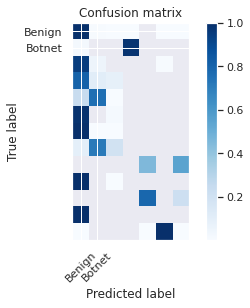

In [ ]:

# plot the confusion matrix for the random forest classifier
predictions.groupBy("LabelIndex", "prediction").count().show()

# plot the ROC curve for the random forest classifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from pyspark.sql.functions import col

# convert the predictions to a pandas dataframe
predictions_pd = predictions.select("LabelIndex", "prediction").toPandas()

# ceate confusion matrix plot
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# apply the confusion matrix plot
cm = predictions.groupBy("Label", "prediction").count().toPandas()
cm = cm.pivot(index='Label', columns='prediction', values='count')
plot_confusion_matrix(cm, classes=['Benign', 'Botnet'], normalize=True, title='Confusion matrix')

In [ ]:
# Student 2 
# Machine Learning Technique: Gradient Boosting Tree Classifier
# What to achieve: Predict the label of the network traffic based on the features of the network traffic using the gradient boosting tree classifier

# create a new dataframe for the gradient boosting tree classifier
IDS_sql_21 = spark.sql(""" SELECT `Dst Port`, `Flow Duration`, `Tot Fwd Pkts`, `Tot Bwd Pkts`, `Protocol`, `Label` FROM IDS_sql """)

# convert except the label column to float
from pyspark.sql.types import FloatType
for col in IDS_sql_21.columns:
    if col != "Label":
        IDS_sql_21 = IDS_sql_21.withColumn(col, IDS_sql_21[col].cast(FloatType()))

# Convert label to numeric using StringIndexer
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Label", outputCol="LabelIndex")
indexed = indexer.fit(IDS_sql_21).transform(IDS_sql_21)
indexed.show()

# assemble the features of the gradient boosting tree classifier
assembler = VectorAssembler(inputCols=["Dst Port", "Flow Duration", "Tot Fwd Pkts", "Tot Bwd Pkts", "Protocol"], outputCol="features")

# split the data into training and testing sets
train, test = indexed.randomSplit([0.7, 0.3], seed=12345)

# create the Decision tree classifier
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol="LabelIndex", featuresCol="features")

# create the pipeline for the Decision tree classifier
pipeline = Pipeline(stages=[assembler, dt])

# train the Decision tree classifier
model = pipeline.fit(train)

# make predictions using the Decision tree classifier
predictions = model.transform(test)

# evaluate the Decision tree classifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="LabelIndex", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

+--------+-------------+------------+------------+--------+------+----------+
|Dst Port|Flow Duration|Tot Fwd Pkts|Tot Bwd Pkts|Protocol| Label|LabelIndex|
+--------+-------------+------------+------------+--------+------+----------+
|     0.0|  1.1264172E8|         3.0|         0.0|     0.0|Benign|       0.0|
|     0.0| 1.12641464E8|         3.0|         0.0|     0.0|Benign|       0.0|
|     0.0| 1.12638624E8|         3.0|         0.0|     0.0|Benign|       0.0|
|    22.0|    6453966.0|        15.0|        10.0|     6.0|Benign|       0.0|
|    22.0|    8804066.0|        14.0|        11.0|     6.0|Benign|       0.0|
|    22.0|    6989341.0|        16.0|        12.0|     6.0|Benign|       0.0|
|     0.0|  1.1264048E8|         3.0|         0.0|     0.0|Benign|       0.0|
|     0.0| 1.12641248E8|         3.0|         0.0|     0.0|Benign|       0.0|
|    80.0|     476513.0|         5.0|         3.0|     6.0|Benign|       0.0|
|    80.0|     475048.0|         5.0|         3.0|     6.0|Benig

In [ ]:
# Student 3 
# Machine Learning Technique: k-means clustering
# What to achieve: Predict the label of the network traffic based on the features of the network traffic using the k-means clustering

# create a new dataframe for the k-means clustering
IDS_sql_22 = spark.sql(""" SELECT `Dst Port`, `Flow Duration`, `Tot Fwd Pkts`, `Tot Bwd Pkts`, `Protocol`, `Label` FROM IDS_sql """)

# Convert label to numeric using StringIndexer
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Label", outputCol="LabelIndex")
indexed = indexer.fit(IDS_sql_22).transform(IDS_sql_22)
indexed.show()

# assemble the features of the k-means clustering
assembler = VectorAssembler(inputCols=["Dst Port", "Flow Duration", "Tot Fwd Pkts", "Tot Bwd Pkts", "Protocol"], outputCol="features")

# cast all columns as float ignoring the label column
from pyspark.sql.types import FloatType
for col in indexed.columns:
    if col != "Label":
        indexed = indexed.withColumn(col, indexed[col].cast(FloatType()))

# split the data into training and testing sets
train, test = indexed.randomSplit([0.7, 0.3], seed=12345)

# create the k-means clustering
kmeans = KMeans().setK(2).setSeed(1)

# create the pipeline for the k-means clustering
pipeline = Pipeline(stages=[assembler, kmeans])

# train the k-means clustering
model = pipeline.fit(train)

# make predictions using the k-means clustering
predictions = model.transform(test)

# print silhouette score
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

+--------+-------------+------------+------------+--------+------+----------+
|Dst Port|Flow Duration|Tot Fwd Pkts|Tot Bwd Pkts|Protocol| Label|LabelIndex|
+--------+-------------+------------+------------+--------+------+----------+
|       0|    112641719|           3|           0|       0|Benign|       0.0|
|       0|    112641466|           3|           0|       0|Benign|       0.0|
|       0|    112638623|           3|           0|       0|Benign|       0.0|
|      22|      6453966|          15|          10|       6|Benign|       0.0|
|      22|      8804066|          14|          11|       6|Benign|       0.0|
|      22|      6989341|          16|          12|       6|Benign|       0.0|
|       0|    112640480|           3|           0|       0|Benign|       0.0|
|       0|    112641244|           3|           0|       0|Benign|       0.0|
|      80|       476513|           5|           3|       6|Benign|       0.0|
|      80|       475048|           5|           3|       6|Benig

In [ ]:
# Student 4 
# Machine Learning Technique: BisectingKMeans clustering
# What to achieve: Predict the label of the network traffic based on the features of the network traffic using the BisectingKMeans clustering

# create a new dataframe for the BisectingKMeans clustering
IDS_sql_22 = spark.sql(""" SELECT `Dst Port`, `Flow Duration`, `Tot Fwd Pkts`, `Tot Bwd Pkts`, `Protocol`, `Label` FROM IDS_sql """)

# Convert label to numeric using StringIndexer
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Label", outputCol="LabelIndex")
indexed = indexer.fit(IDS_sql_22).transform(IDS_sql_22)
indexed.show()

# assemble the features of the BisectingKMeans clustering
assembler = VectorAssembler(inputCols=["Dst Port", "Flow Duration", "Tot Fwd Pkts", "Tot Bwd Pkts", "Protocol"], outputCol="features")

# cast all columns as float ignoring the label column
from pyspark.sql.types import FloatType
for col in indexed.columns:
    if col != "Label":
        indexed = indexed.withColumn(col, indexed[col].cast(FloatType()))

# split the data into training and testing sets
train, test = indexed.randomSplit([0.7, 0.3], seed=12345)

# create the BisectingKMeansclustering
from pyspark.ml.clustering import BisectingKMeans
bkm = BisectingKMeans().setK(2).setSeed(1)

# create the pipeline for the BisectingKMeans clustering
pipeline = Pipeline(stages=[assembler, bkm])

# train the BisectingKMeans clustering
model = pipeline.fit(train)

# make predictions using the BisectingKMeans clustering
predictions = model.transform(test)

# print silhouette score
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

+--------+-------------+------------+------------+--------+------+----------+
|Dst Port|Flow Duration|Tot Fwd Pkts|Tot Bwd Pkts|Protocol| Label|LabelIndex|
+--------+-------------+------------+------------+--------+------+----------+
|       0|    112641719|           3|           0|       0|Benign|       0.0|
|       0|    112641466|           3|           0|       0|Benign|       0.0|
|       0|    112638623|           3|           0|       0|Benign|       0.0|
|      22|      6453966|          15|          10|       6|Benign|       0.0|
|      22|      8804066|          14|          11|       6|Benign|       0.0|
|      22|      6989341|          16|          12|       6|Benign|       0.0|
|       0|    112640480|           3|           0|       0|Benign|       0.0|
|       0|    112641244|           3|           0|       0|Benign|       0.0|
|      80|       476513|           5|           3|       6|Benign|       0.0|
|      80|       475048|           5|           3|       6|Benig

# **Convert ipynb to HTML for Turnitin submission [10 marks]**

---



In [ ]:
# install nbconvert
!pip3 install nbconvert


# convert ipynb to html
# file name: Group111_CN7031.html
!jupyter nbconvert --to html Group111_CN7031.ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[NbConvertApp] Converting notebook Group111_CN7031.ipynb to html
[NbConvertApp] Writing 625824 bytes to Group111_CN7031.html
